In [1]:
import numpy as np
import copy
import pandas as pd
import numpy as np
import math
from pprint import pprint
from collections import OrderedDict

In [2]:
class Node():
    def __init__(self, attribute, threshold, left_nums=0, right_nums=0, leaf_nums=0, ig=0):
        # Which column does it belong to
        self.attr = attribute
        # What is the threshold value that led to its split
        self.thres = threshold

        self.left = None
        self.right = None

        # Demographic data at that node
        self.left_nums = 0
        self.right_nums = 0
        self.leaf_nums = 0

        # Is it a leaf
        self.leaf = False
        # Label assigned to a node if leaf
        self.predict = None
        self.ig = ig

In [3]:
def entropy(data):
    count = len(data)
    outcome = list(data["Outcome"])
    p0 = float(sum(b == 1 for b in outcome) / count)
    p1 = float(1 - p0)
    if p0 == 0 or p1 == 0:
        H = 0
    else:
        H = -p0*np.log2(p0)-p1*(np.log2(p1))
    return H

def info_gain(df, fea, threshold):
    count = len(df)
    sub_1 = df[df[fea] < threshold]
    sub_2 = df[df[fea] >= threshold]
    if len(sub_1) == 0 or len(sub_2) == 0: 
        print(fea + " split at " + str(threshold) + ": IG: 0" + " Gain Ratio: inf")
        return 0

    remainder = float((sub_1.shape[0]/count) * entropy(sub_1) + (sub_2.shape[0]/count) * entropy(sub_2))
    I = float(-1*sub_1.shape[0]/count)*np.log2(sub_1.shape[0]/count) + float(-1*sub_2.shape[0]/count)*np.log2(sub_2.shape[0]/count)
    infoGain = entropy(df)- remainder
    gain_ratio = infoGain /I
    print(fea + " split at " + str(threshold) + ": IG: " + str(infoGain)+ " Gain Ratio: " + str(gain_ratio))
    return infoGain

In [4]:
df = pd.read_csv("Druns.txt", sep=" ", header=None)
df.columns = ['x1', 'x2', 'Outcome']
cols = df.columns   
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')

In [5]:
info_gain(df,'x2',8)
info_gain(df,'x2',7)
info_gain(df,'x2',6)
info_gain(df,'x2',5)
info_gain(df,'x2',4)
info_gain(df,'x2',3)
info_gain(df,'x2',2)
info_gain(df,'x2',1)
info_gain(df,'x2',0)
info_gain(df,'x2',-1)
info_gain(df,'x2',-2)
info_gain(df,'x1',0.1)
info_gain(df,'x1',0)

x2 split at 8: IG: 0.18905266854301617 Gain Ratio: 0.4301569161309807
x2 split at 7: IG: 0.03827452220629246 Gain Ratio: 0.055953759631263526
x2 split at 6: IG: 0.19958702318968735 Gain Ratio: 0.23609960614360798
x2 split at 5: IG: 0.10519553207004628 Gain Ratio: 0.11124029586339801
x2 split at 4: IG: 0.04945207278939401 Gain Ratio: 0.049749064181778546
x2 split at 3: IG: 0.016313165825732057 Gain Ratio: 0.016411136842102134
x2 split at 2: IG: 0.0010821659130775263 Gain Ratio: 0.0011443495172767494
x2 split at 1: IG: 0.004886164091842726 Gain Ratio: 0.00578004220515232
x2 split at 0: IG: 0.03827452220629246 Gain Ratio: 0.055953759631263526
x2 split at -1: IG: 0.04417739186726133 Gain Ratio: 0.10051807676021828
x2 split at -2: IG: 0 Gain Ratio: inf
x1 split at 0.1: IG: 0.04417739186726133 Gain Ratio: 0.10051807676021828
x1 split at 0: IG: 0 Gain Ratio: inf


0

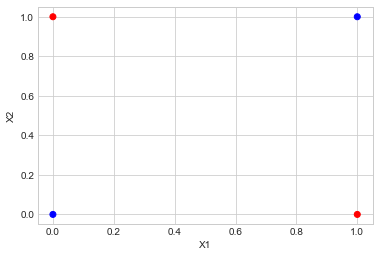

In [6]:
#2.2
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

plt.xlabel('X1')
plt.ylabel('X2')

plt.scatter([0, 0, 1, 1], [0, 1, 0, 1], color=['blue','red','red','blue'])

In [22]:
#define again without the print
def entropy(data):
    count = len(data)
    outcome = list(data["Outcome"])
    p0 = float(sum(b == 1 for b in outcome) / count)
    p1 = float(1 - p0)
    if p0 == 0 or p1 == 0:
        H = 0
    else:
        H = -p0*np.log2(p0)-p1*(np.log2(p1))
    return H

def info_gain(df, fea, threshold):
    count = len(df)
    sub_1 = df[df[fea] < threshold]
    sub_2 = df[df[fea] >= threshold]
    if len(sub_1) == 0 or len(sub_2) == 0: 
        #print(fea + " split at " + str(threshold) + ": IG: 0" + " Gain Ratio: inf")
        return 0

    remainder = float((sub_1.shape[0]/count) * entropy(sub_1) + (sub_2.shape[0]/count) * entropy(sub_2))
    I = float(-1*sub_1.shape[0]/count)*np.log2(sub_1.shape[0]/count) + float(-1*sub_2.shape[0]/count)*np.log2(sub_2.shape[0]/count)
    infoGain = entropy(df)- remainder
    gain_ratio = infoGain /I
    #print(fea + " split at " + str(threshold) + ": IG: " + str(infoGain)+ " Gain Ratio: " + str(gain_ratio))
    return infoGain

def find_best_split(data,fea):
    #find the feature that is interested
    thresholds = data[fea].tolist()
    thresholds = [float(x) for x in thresholds]
    #find the split with max infoGain
    max_ig = float("-inf")
    best_split = 0
    
    for i in range(0, len(thresholds)):
            thres = thresholds[i]
            ig = info_gain(data, fea, thres)
            if ig >= max_ig:
                max_ig = ig
                best_split = thres

    return best_split

def choose_feature(df):
    max_ig = float("-inf")
    best_fea = None
    threshold = 0
    fea_list = list(df.columns)[:-1]
    
    for fea in fea_list:
        thres = find_best_split(df, fea)
        ig = info_gain(df, fea, thres)
        if ig > max_ig:
                max_ig = ig
                best_fea = fea
                threshold = thres
        
    return best_fea, threshold, max_ig

def build_tree(df):
    outcome = list(df["Outcome"])
    p1 = sum(b == 1 for b in outcome)
    p0 = sum(b == 0 for b in outcome)
    if p1 == 0 or p0 == 0:
        leaf = Node(None,None)
        leaf.leaf = True
        if p1 >= p0:
            leaf.predict = 1
        else:
            leaf.predict = 0
        leaf.leaf_nums = p1+p0
        return leaf
    else:
        best_fea, threshold, ig = choose_feature(df)
        tree = Node(best_fea, threshold, ig=ig)
        sub_1 = df[df[best_fea] >= threshold]
        sub_2 = df[df[best_fea] < threshold]

        tree.left_nums = sub_1.shape[0]
        tree.right_nums = sub_2.shape[0]

        tree.left = build_tree(sub_1)
        tree.right = build_tree(sub_2)
        return tree
    
def print_tree(root):
    if (root.leaf):
        print('return ',root.predict)
    else:
        print('if （',root.attr,' >= ',root.thres,')')
        print_tree(root.left)
        
        print('else')
        print_tree(root.right)

In [24]:
df = pd.read_csv("D3leaves.txt", sep=" ", header=None)
df.columns = ['x1', 'x2', 'Outcome']
cols = df.columns   
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')
tree = build_tree(df)
print_tree(tree)

if （ x1  >=  10.0 )
return  1
else
if （ x2  >=  3.0 )
return  1
else
return  0


In [26]:
#p2.5 & 2.6
data_d1 = pd.read_csv("D1.txt", sep=" ", header=None)
data_d1.columns = ['x1', 'x2', 'Outcome']
cols = data_d1.columns   
data_d1[cols] = data_d1[cols].apply(pd.to_numeric, errors='coerce')
d1_tree = build_tree(data_d1)
print_tree(d1_tree)
print()
data_d2 = pd.read_csv("D2.txt", sep=" ", header=None)
data_d2.columns = ['x1', 'x2', 'Outcome']
cols = data_d2.columns   
data_d2[cols] = data_d2[cols].apply(pd.to_numeric, errors='coerce')
d2_tree = build_tree(data_d2)
print_tree(d2_tree)

if （ x2  >=  0.201829 )
return  1
else
return  0

if （ x1  >=  0.533076 )
if （ x2  >=  0.383738 )
if （ x1  >=  0.550364 )
return  1
else
if （ x2  >=  0.474971 )
return  1
else
return  0
else
if （ x1  >=  0.761423 )
if （ x2  >=  0.191206 )
return  1
else
if （ x1  >=  0.90482 )
if （ x2  >=  0.037708 )
if （ x1  >=  0.930371 )
return  1
else
if （ x1  >=  0.927522 )
return  0
else
return  1
else
return  0
else
if （ x2  >=  0.169053 )
if （ x1  >=  0.850316 )
return  1
else
return  0
else
return  0
else
if （ x2  >=  0.301105 )
if （ x1  >=  0.66337 )
return  1
else
return  0
else
return  0
else
if （ x2  >=  0.639018 )
if （ x1  >=  0.111076 )
if （ x2  >=  0.861 )
return  1
else
if （ x1  >=  0.33046 )
return  1
else
if （ x2  >=  0.745406 )
if （ x1  >=  0.254049 )
return  1
else
if （ x1  >=  0.191915 )
if （ x2  >=  0.792752 )
return  1
else
return  0
else
return  0
else
return  0
else
if （ x2  >=  0.964767 )
return  1
else
return  0
else
if （ x2  >=  0.534979 )
if （ x1  >=  0.409972 )
if （ x1  >=

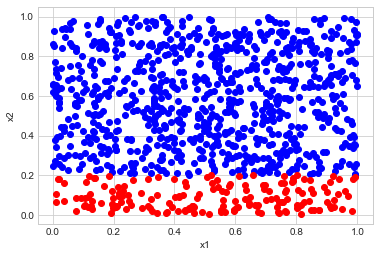

In [28]:
x_blue = np.array(data_d1[data_d1['Outcome']==1]['x1'])
y_blue = np.array(data_d1[data_d1['Outcome']==1]['x2'])
x_red = np.array(data_d1[data_d1['Outcome']==0]['x1'])
y_red = np.array(data_d1[data_d1['Outcome']==0]['x2'])

plt.xlabel('x1')
plt.ylabel('x2')

plt.plot(x_blue, y_blue, 'o', color='blue')
plt.plot(x_red, y_red, 'o', color='red')



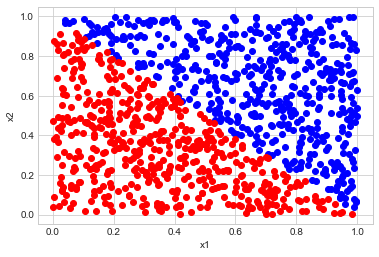

In [29]:
x_blue = np.array(data_d2[data_d2['Outcome']==1]['x1'])
y_blue = np.array(data_d2[data_d2['Outcome']==1]['x2'])
x_red = np.array(data_d2[data_d2['Outcome']==0]['x1'])
y_red = np.array(data_d2[data_d2['Outcome']==0]['x2'])

plt.xlabel('x1')
plt.ylabel('x2')

plt.plot(x_blue, y_blue, 'o', color='blue')
plt.plot(x_red, y_red, 'o', color='red')

In [30]:
#p2.7
df = pd.read_csv("Dbig.txt", sep=" ", header=None)
df.columns = ['x1', 'x2', 'Outcome']
cols = df.columns   
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')

In [52]:
def single_predict(node, row_df):
# If we are at a leaf node, return the prediction of the leaf node
    if node.leaf:
        return node.predict
    # Traverse left or right subtree based on instance's data
    if row_df[node.attr] >= node.thres:
        return single_predict(node.left, row_df)
    elif row_df[node.attr] < node.thres:
        return single_predict(node.right, row_df)
    
    
def test_predictions(tree,test_data):
        root = tree
        num_data = test_data.shape[0]
        num_correct = 0
        for index,row in test_data.iterrows():
            prediction = single_predict(root, row)
            if prediction == row['Outcome']:
                num_correct += 1
        metrics = {
            "Accuracy": round(num_correct/num_data, 2),
            "Error": 1 - round(num_correct/num_data, 2),
        }
        return metrics

def count_nodes(node):
    if node is None:
        return 0
    return 1 + count_nodes(node.left) + count_nodes(node.right)



In [69]:
dbig_train = df.sample(n=8192)
df_test = df.loc[~df.index.isin(dbig_train.index)]
d32 = dbig_train[:32]
d128 = dbig_train[:128]
d512 = dbig_train[:512]
d2048 = dbig_train[:2048]
d8192 = dbig_train[:8192]

tree_32 = build_tree(d32)
err_32 = test_predictions(tree_32,df_test)

In [70]:
tree_128 = build_tree(d128)
err_128 = test_predictions(tree_128,df_test)

In [71]:
tree_512 = build_tree(d512)
err_512 = test_predictions(tree_512,df_test)

In [72]:
tree_2048 = build_tree(d2048)
err_2048 = test_predictions(tree_2048,df_test)

In [73]:
tree_8192 = build_tree(d8192)
err_8192 = test_predictions(tree_8192,df_test)

[13, 19, 37, 99, 191]
[0.21999999999999997, 0.06000000000000005, 0.050000000000000044, 0.030000000000000027, 0.020000000000000018]


Text(0, 0.5, 'error_n')

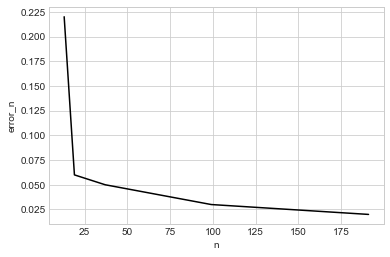

In [75]:
n = [count_nodes(tree_32), count_nodes(tree_128), count_nodes(tree_512), count_nodes(tree_2048), count_nodes(tree_8192)]
print(n)
err = [err_32['Error'], err_128['Error'], err_512['Error'], err_2048['Error'], err_8192['Error']]
print(err)
plt.plot(n, err, '', color='black')
plt.xlabel('n')
plt.ylabel('error_n')

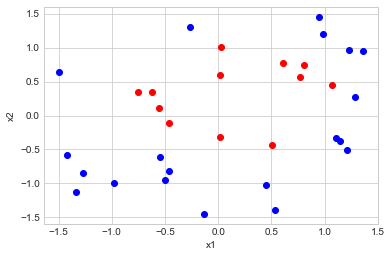

In [85]:
x_black = np.array(d32[d32['Outcome']==1]['x1'])
y_black = np.array(d32[d32['Outcome']==1]['x2'])
x_red = np.array(d32[d32['Outcome']==0]['x1'])
y_red = np.array(d32[d32['Outcome']==0]['x2'])

plt.xlabel('x1')
plt.ylabel('x2')

plt.plot(x_black, y_black, 'o', color='blue')
plt.plot(x_red, y_red, 'o', color='red')

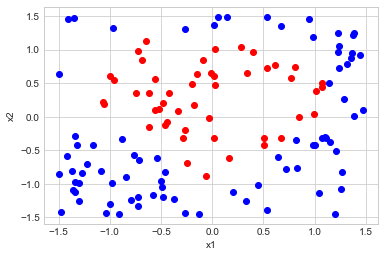

In [81]:
x_black = np.array(d128[d128['Outcome']==1]['x1'])
y_black = np.array(d128[d128['Outcome']==1]['x2'])
x_red = np.array(d128[d128['Outcome']==0]['x1'])
y_red = np.array(d128[d128['Outcome']==0]['x2'])

plt.xlabel('x1')
plt.ylabel('x2')

plt.plot(x_black, y_black, 'o', color='blue')
plt.plot(x_red, y_red, 'o', color='red')

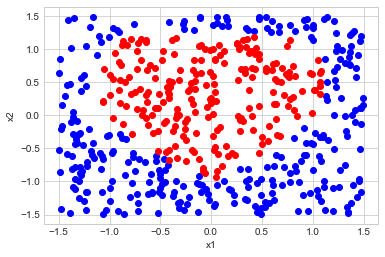

In [82]:
x_black = np.array(d512[d512['Outcome']==1]['x1'])
y_black = np.array(d512[d512['Outcome']==1]['x2'])
x_red = np.array(d512[d512['Outcome']==0]['x1'])
y_red = np.array(d512[d512['Outcome']==0]['x2'])

plt.xlabel('x1')
plt.ylabel('x2')

plt.plot(x_black, y_black, 'o', color='blue')
plt.plot(x_red, y_red, 'o', color='red')

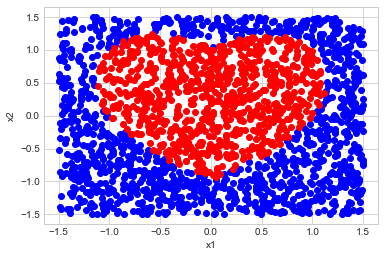

In [83]:
x_black = np.array(d2048[d2048['Outcome']==1]['x1'])
y_black = np.array(d2048[d2048['Outcome']==1]['x2'])
x_red = np.array(d2048[d2048['Outcome']==0]['x1'])
y_red = np.array(d2048[d2048['Outcome']==0]['x2'])

plt.xlabel('x1')
plt.ylabel('x2')

plt.plot(x_black, y_black, 'o', color='blue')
plt.plot(x_red, y_red, 'o', color='red')

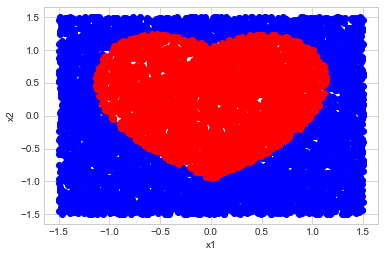

In [84]:
x_black = np.array(d8192[d8192['Outcome']==1]['x1'])
y_black = np.array(d8192[d8192['Outcome']==1]['x2'])
x_red = np.array(d8192[d8192['Outcome']==0]['x1'])
y_red = np.array(d8192[d8192['Outcome']==0]['x2'])

plt.xlabel('x1')
plt.ylabel('x2')

plt.plot(x_black, y_black, 'o', color='blue')
plt.plot(x_red, y_red, 'o', color='red')

In [87]:
#SK LEARN
from sklearn.tree import DecisionTreeClassifier


df = pd.read_csv("Dbig.txt", sep=" ", header=None)
df.columns = ['x1', 'x2', 'Outcome']
cols = df.columns   
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')


dbig_train = df.sample(n=8192)
df_test = df.loc[~df.index.isin(dbig_train.index)]
d32 = dbig_train[:32]
d128 = dbig_train[:128]
d512 = dbig_train[:512]
d2048 = dbig_train[:2048]
d8192 = dbig_train[:8192]



clf = DecisionTreeClassifier(criterion="entropy")

x_32 = d32.drop(columns='Outcome')
y_32 = d32['Outcome']

x_128 = d128.drop(columns='Outcome')
y_128 = d128['Outcome']

x_512 = d512.drop(columns='Outcome')
y_512 = d512['Outcome']

x_2048 = d2048.drop(columns='Outcome')
y_2048 = d2048['Outcome']

x_8192 = d8192.drop(columns='Outcome')
y_8192 = d8192['Outcome']

tree_32 = clf.fit(x_32, y_32)
node_cnt_32 = clf.tree_.node_count
x_test_32 = df_test.drop(columns='Outcome')
y_test_32 = df_test['Outcome']
err_32 = 1- tree_32.score(x_test_32, y_test_32)
print(err_32)

tree128 = clf.fit(x_128, y_128)
node_cnt_128 = clf.tree_.node_count
x_test_128 = df_test.drop(columns='Outcome')
y_test_128 = df_test['Outcome']
err_128 = 1- tree128.score(x_test_128, y_test_128)
print(err_128)

tree_512 = clf.fit(x_512, y_512)
node_cnt_512 = clf.tree_.node_count
x_test_512 = df_test.drop(columns='Outcome')
y_test_512 = df_test['Outcome']
err_512 = 1- tree_512.score(x_test_512, y_test_512)

tree_2048 = clf.fit(x_2048, y_2048)
node_cnt_2048 = clf.tree_.node_count
x_test_2048 = df_test.drop(columns='Outcome')
y_test_2048 = df_test['Outcome']
err_2048 = 1- tree_2048.score(x_test_2048, y_test_2048)

tree_8192 = clf.fit(x_8192, y_8192)
node_cnt_8192 = clf.tree_.node_count
x_test_8192 = df_test.drop(columns='Outcome')
y_test_8192 = df_test['Outcome']
err_8192 = 1- tree_8192.score(x_test_8192, y_test_8192)

0.2566371681415929
0.06803097345132747


[7, 19, 57, 97, 219]
[0.2566371681415929, 0.06803097345132747, 0.033738938053097356, 0.025995575221238965, 0.015486725663716783]


Text(0, 0.5, 'error_n')

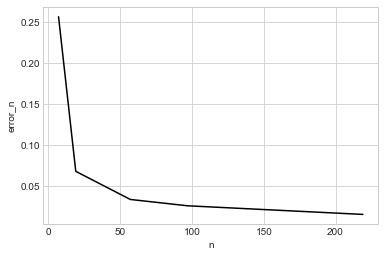

In [88]:
n = [node_cnt_32, node_cnt_128, node_cnt_512, node_cnt_2048, node_cnt_8192]
print(n)
err = [err_32, err_128, err_512, err_2048, err_8192]
print(err)
plt.plot(n, err, '', color='black')
plt.xlabel('n')
plt.ylabel('error_n')


In [92]:
#Problem 4
x = (10 - 0) * np.random.random_sample((100,))
y = np.sin(x)

from scipy.interpolate import lagrange
poly = lagrange(x, y)

x_test = (10 - 0) * np.random.random_sample((100,))
y_test = np.sin(x_test)
poly = lagrange(x_test, y_test)

from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(poly(x), y))
print(mean_absolute_error(poly(x_test), y_test))

6.0240681401377375e+69
7.961265546265365e+69


In [96]:
noise = np.random.normal(0, 1, 100)
x = (10 - 0) * np.random.random_sample((100,))
x = noise+x
poly = lagrange(x, y)
print(mean_absolute_error(poly(x), y))
x_test = (10 - 0) * np.random.random_sample((100,))
y_test = np.sin(x_test)
poly = lagrange(x_test, y_test)
mean_absolute_error(poly(x_test), y_test)

3.401296841573264e+71


8.381983211735076e+75

In [97]:
noise = np.random.normal(0, 10, 100)
x = (10 - 0) * np.random.random_sample((100,))
x = noise+x
poly = lagrange(x, y)
print(mean_absolute_error(poly(x), y))
x_test = (10 - 0) * np.random.random_sample((100,))
y_test = np.sin(x_test)
poly = lagrange(x_test, y_test)
mean_absolute_error(poly(x_test), y_test)

3.538470614878781e+63


2.7350241953620593e+71

In [98]:
noise = np.random.normal(0, 50, 100)
x = (10 - 0) * np.random.random_sample((100,))
x = noise+x
poly = lagrange(x, y)
print(mean_absolute_error(poly(x), y))
x_test = (10 - 0) * np.random.random_sample((100,))
y_test = np.sin(x_test)
poly = lagrange(x_test, y_test)
mean_absolute_error(poly(x_test), y_test)

4.7581126297460597e+58


2.933604990853524e+83